In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Set a consistent style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (5, 6) # Set default figure size


df = pd.read_csv('ev_population_data_cleaned.csv')
print("Dataset loaded successfully!")

# Re-cast identifier columns if they were numeric
df['Postal Code'] = df['Postal Code'].astype(str)
df['Legislative District'] = df['Legislative District'].astype(str)
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].astype(str)
df['2020 Census Tract'] = df['2020 Census Tract'].astype(str)

df.info()

Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177857 entries, 0 to 177856
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177857 non-null  object 
 1   County                                             177857 non-null  object 
 2   City                                               177857 non-null  object 
 3   State                                              177857 non-null  object 
 4   Postal Code                                        177857 non-null  object 
 5   Model Year                                         177857 non-null  int64  
 6   Make                                               177857 non-null  object 
 7   Model                                              177857 non-null  object 
 8   Electric Vehicle Type                        


--- Top 10 States by EV Registrations ---
State
WA    177473
CA       101
VA        46
MD        31
TX        23
NC        16
IL        15
CO        12
AZ        10
FL        10
Name: count, dtype: int64


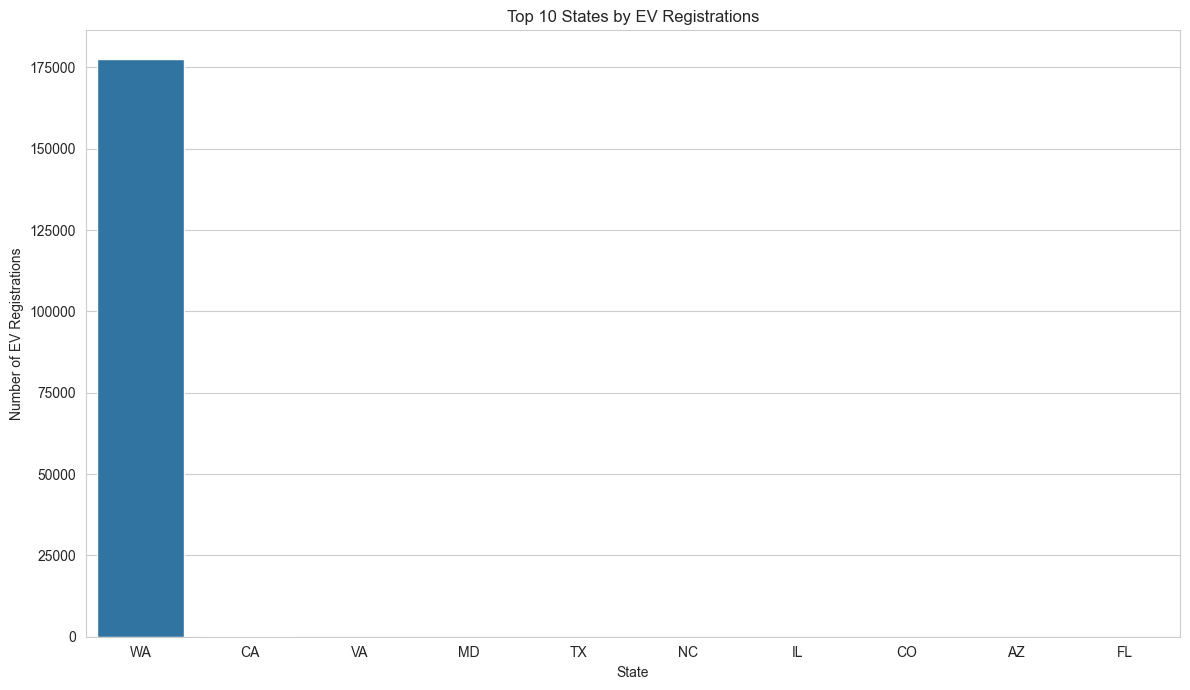

In [3]:
# Geographical Distribution

print("\n--- Top 10 States by EV Registrations ---")
top_states = df['State'].value_counts().head(10)
print(top_states)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 States by EV Registrations')
plt.xlabel('State')
plt.ylabel('Number of EV Registrations')
plt.tight_layout()
plt.show()

**The dataset is overwhelmingly composed of records from Washington State (WA). Therefore, all subsequent analyses will focus exclusively on WA to ensure relevance and accuracy.**

In [4]:
# Filter for Washington only
df = df[df['State'] == 'WA']


--- Cumulative EV Population ---
    Model Year  Annual New EV Registrations  Cumulative Number of EVs  \
1         1998                            1                         2   
2         1999                            5                         7   
3         2000                            7                        14   
4         2002                            2                        16   
5         2003                            1                        17   
6         2008                           19                        36   
7         2010                           23                        59   
8         2011                          775                       834   
9         2012                         1614                      2448   
10        2013                         4399                      6847   
11        2014                         3496                     10343   
12        2015                         4826                     15169   
13        2016   

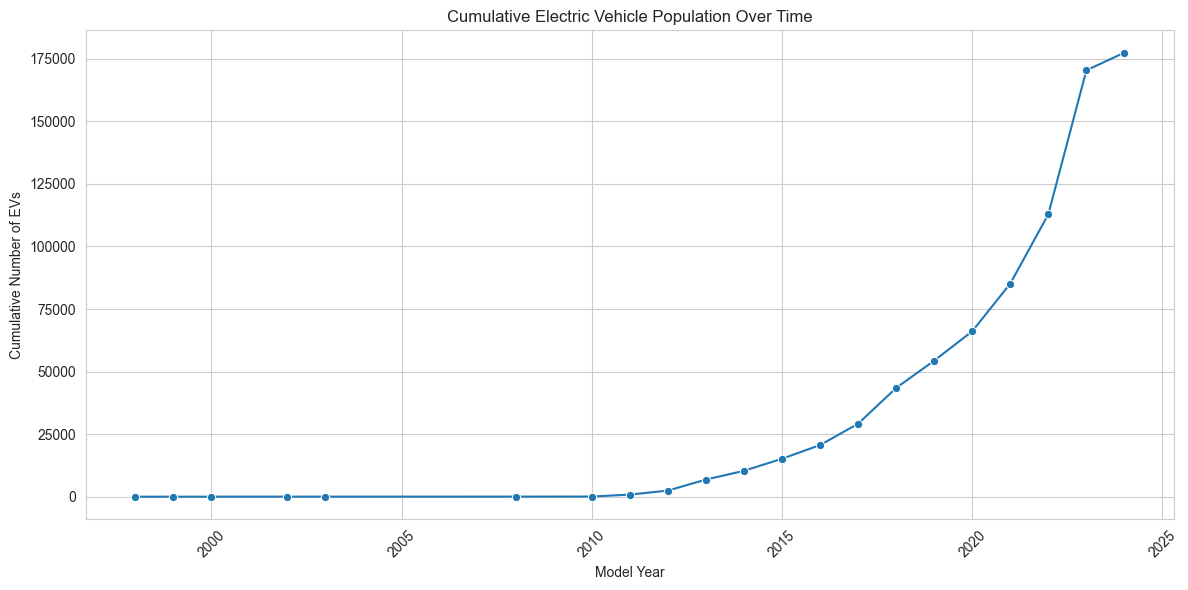

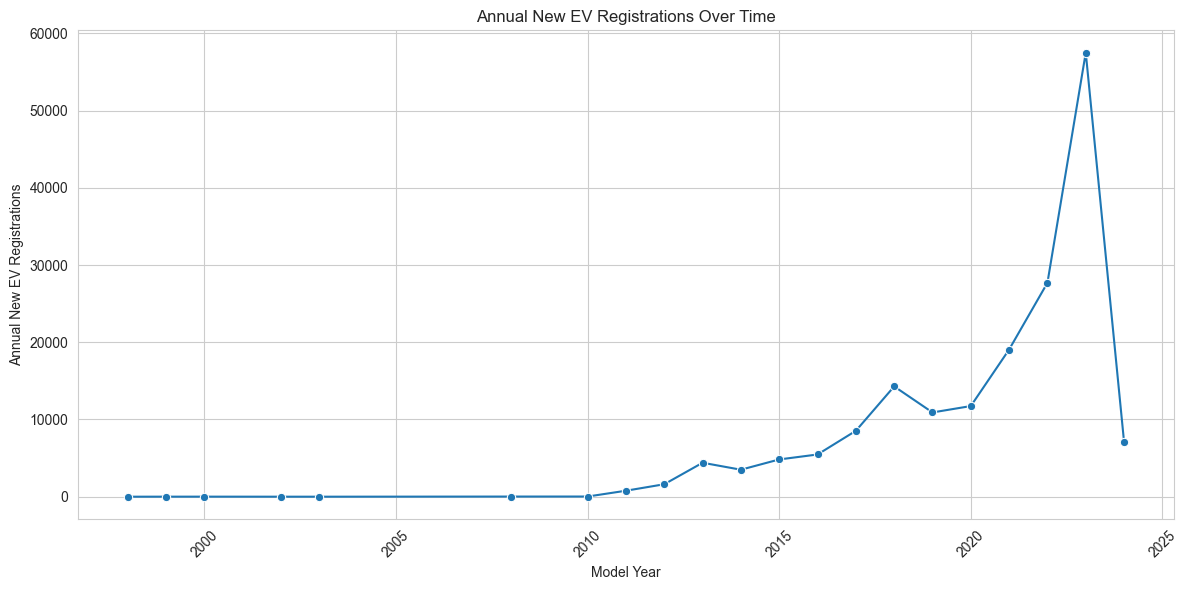

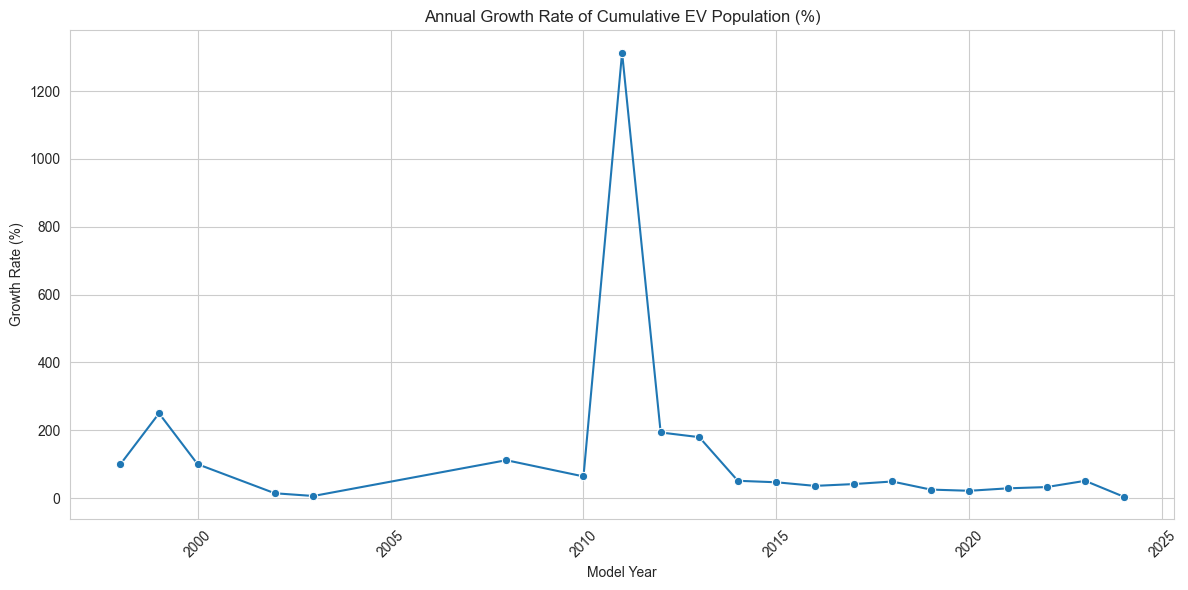

In [5]:
# Analyze Overall Time-Series Trends

# Visualize the primary market size and growth trend.
# Calculate annual and cumulative EV registrations
annual_ev_registrations = df.groupby('Model Year')['DOL Vehicle ID'].nunique().reset_index()
annual_ev_registrations.rename(columns={'DOL Vehicle ID': 'Annual New EV Registrations'}, inplace=True)

cumulative_ev_population = annual_ev_registrations.sort_values('Model Year').copy()
cumulative_ev_population['Cumulative Number of EVs'] = cumulative_ev_population['Annual New EV Registrations'].cumsum()

# Calculate Growth Rate (%)
# Why: To understand the pace of market expansion year-over-year.
cumulative_ev_population['Growth Rate (%)'] = cumulative_ev_population['Cumulative Number of EVs'].pct_change() * 100
cumulative_ev_population.replace([np.inf, -np.inf], np.nan, inplace=True)
cumulative_ev_population.dropna(inplace=True)

print("\n--- Cumulative EV Population ---")
print(cumulative_ev_population.head(21))

# Plotting the trends again for context in this new notebook
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_ev_population, x='Model Year', y='Cumulative Number of EVs', marker='o')
plt.title('Cumulative Electric Vehicle Population Over Time')
plt.xlabel('Model Year')
plt.ylabel('Cumulative Number of EVs')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_ev_population, x='Model Year', y='Annual New EV Registrations', marker='o')
plt.title('Annual New EV Registrations Over Time')
plt.xlabel('Model Year')
plt.ylabel('Annual New EV Registrations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_ev_population, x='Model Year', y='Growth Rate (%)', marker='o')
plt.title('Annual Growth Rate of Cumulative EV Population (%)')
plt.xlabel('Model Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations:**
- WA is experiencing rapid and accelerating EV adoption.
- 2023 marks a breakout year for new registrations.
- Growth is exponential, indicating strong policy, infrastructure, and consumer interest in WA.


--- Top 10 EV Makes ---
Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64


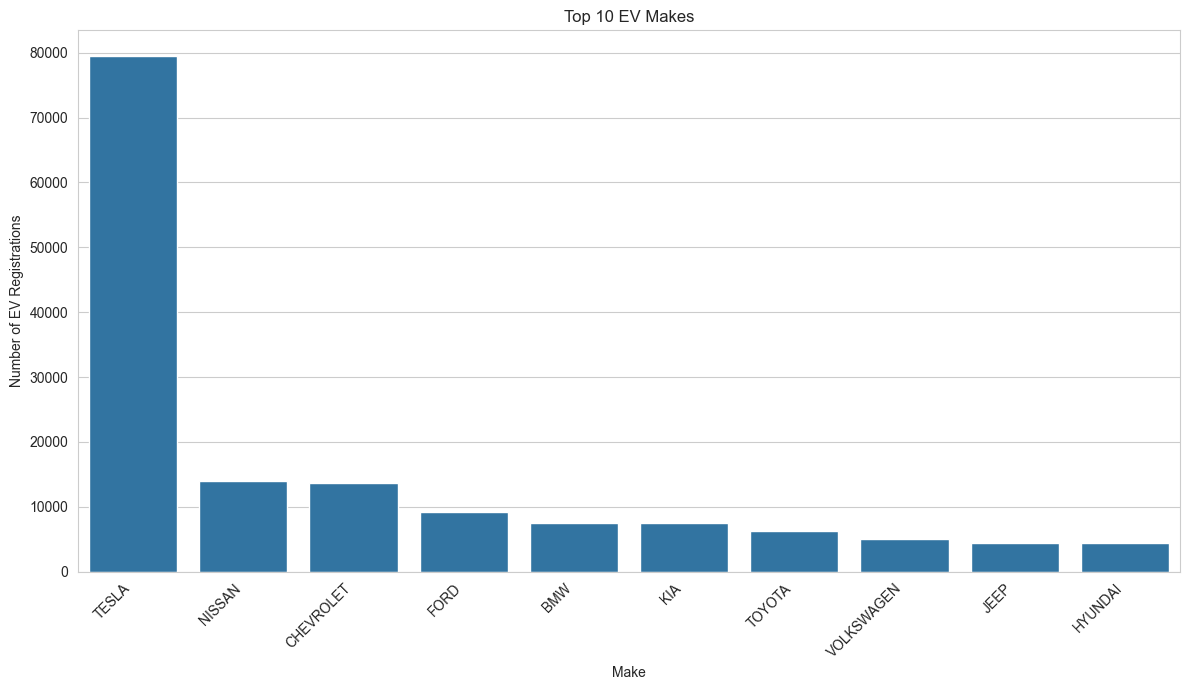


--- Top 10 EV Models ---
Model
MODEL Y           35921
MODEL 3           30009
LEAF              13352
MODEL S            7711
BOLT EV            6811
MODEL X            5784
VOLT               4782
ID.4               3928
WRANGLER           3382
MUSTANG MACH-E     3316
Name: count, dtype: int64


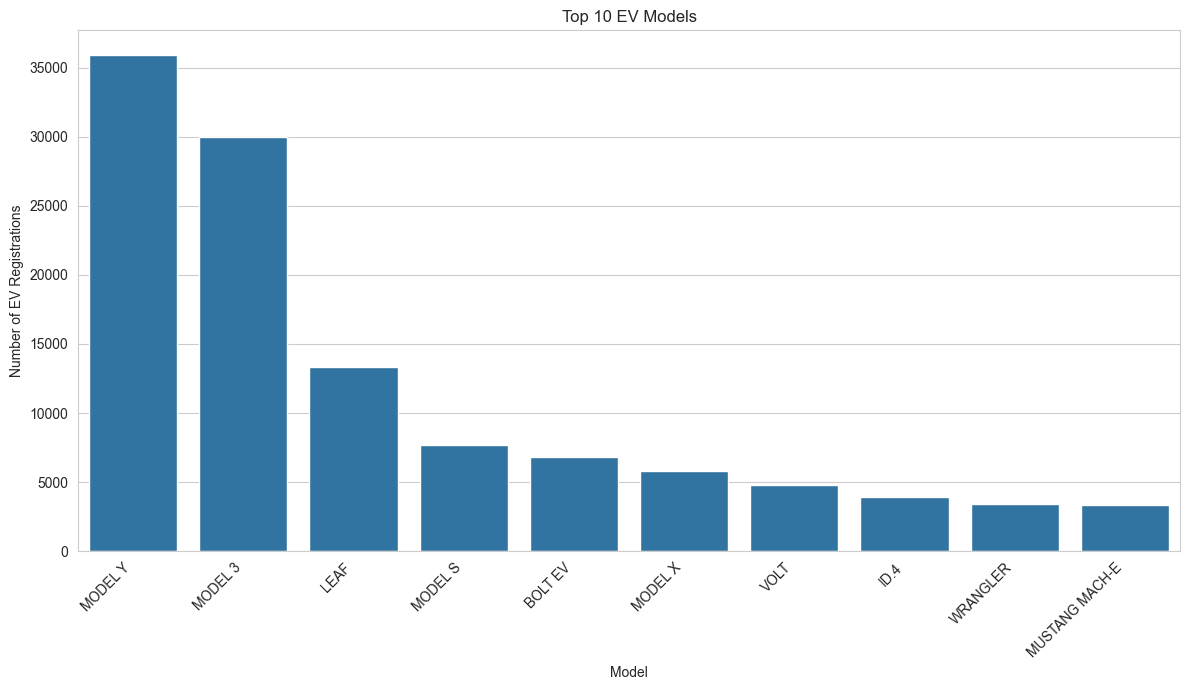

In [6]:
# Top EV Makes and Models

# Analyze top 10 Makes
print("\n--- Top 10 EV Makes ---")
top_makes = df['Make'].value_counts().head(10)
print(top_makes)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Top 10 EV Makes')
plt.xlabel('Make')
plt.ylabel('Number of EV Registrations')
plt.xticks(rotation=45, ha='right') # Rotate and align for readability
plt.tight_layout()
plt.show()

# Analyze top 10 Models
print("\n--- Top 10 EV Models ---")
top_models = df['Model'].value_counts().head(10)
print(top_models)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Top 10 EV Models')
plt.xlabel('Model')
plt.ylabel('Number of EV Registrations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observations:**
- Tesla’s dominance in both make and model is clear in Washington, reflecting strong brand preference and market penetration.
- Non-Tesla brands (especially Nissan and Chevrolet) have a significant but much smaller presence, indicating some diversity in consumer choice.
- The presence of newer models (e.g., VW ID.4, Mustang Mach-E) in the top 10 suggests that the WA market is receptive to new entrants and innovation.


--- Distribution by Electric Vehicle Type ---
Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64


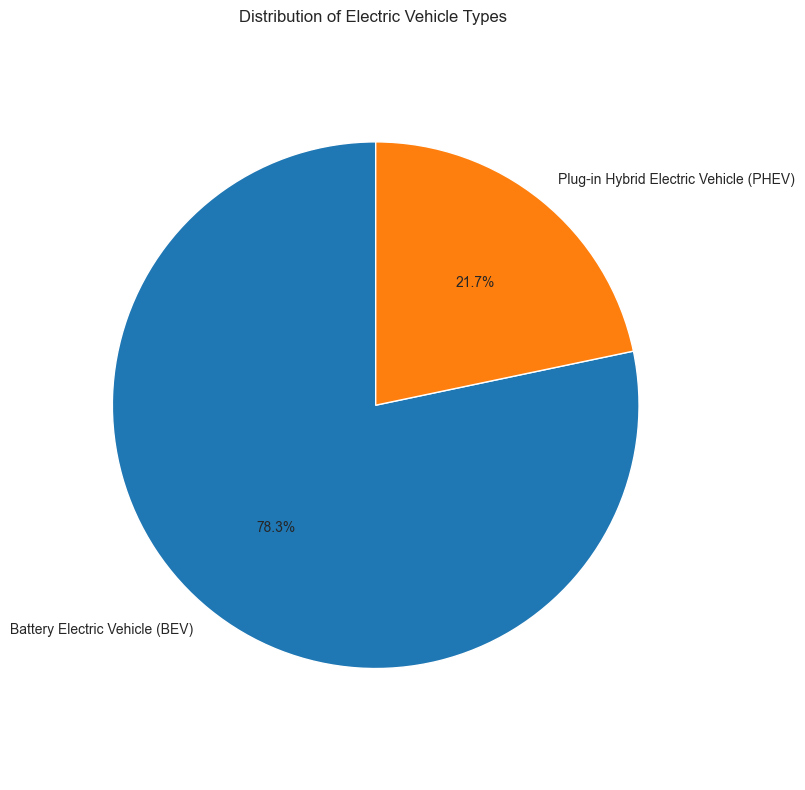

In [7]:
# Distribution by Electric Vehicle Type

print("\n--- Distribution by Electric Vehicle Type ---")
ev_type_counts = df['Electric Vehicle Type'].value_counts()
print(ev_type_counts)

plt.figure(figsize=(8, 8))
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types ')
plt.axis('equal')
plt.tight_layout()
plt.show()

Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
Model Year                                              
1997                                              1.0   
1998                                              1.0   
1999                                              5.0   
2000                                              7.0   
2002                                              2.0   
2003                                              1.0   
2008                                             19.0   
2010                                             20.0   
2011                                            699.0   
2012                                            757.0   
2013                                           2827.0   
2014                                           1737.0   
2015                                           3540.0   
2016                                           3725.0   
2017                                           4508.0   
2018                           

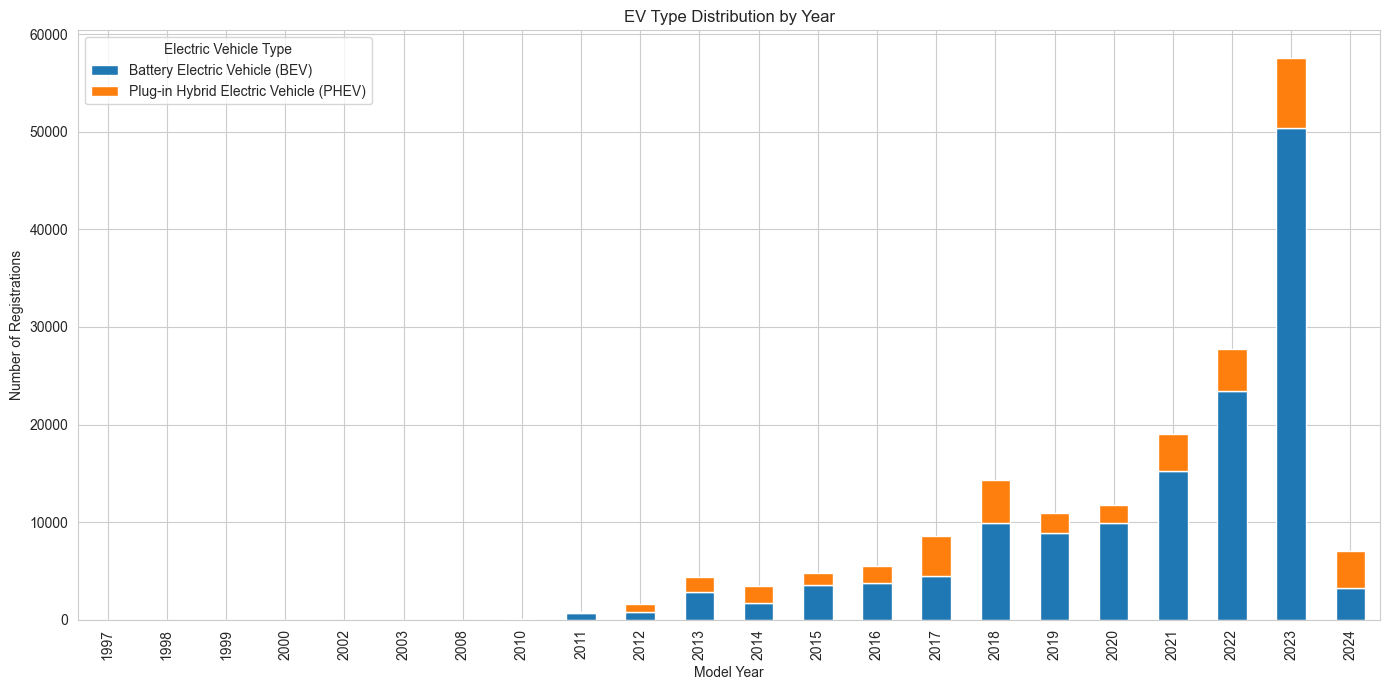

In [8]:
# Analyze EV Type Distribution Over Time


ev_type_by_year = df.groupby(['Model Year', 'Electric Vehicle Type'])['DOL Vehicle ID'].nunique().unstack()
print(ev_type_by_year)

ev_type_by_year.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('EV Type Distribution by Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()

**Observations**
- BEVs are the dominant EV type in Washington, and their dominance is increasing over time.
- PHEVs, while present, are becoming a smaller share of the market.
- This trend suggests that infrastructure, incentives, and consumer preferences in WA strongly favor fully electric vehicles.

County
King         92740
Snohomish    21001
Pierce       13782
Clark        10409
Thurston      6428
Kitsap        5840
Spokane       4586
Whatcom       4253
Benton        2147
Skagit        1910
Name: count, dtype: int64


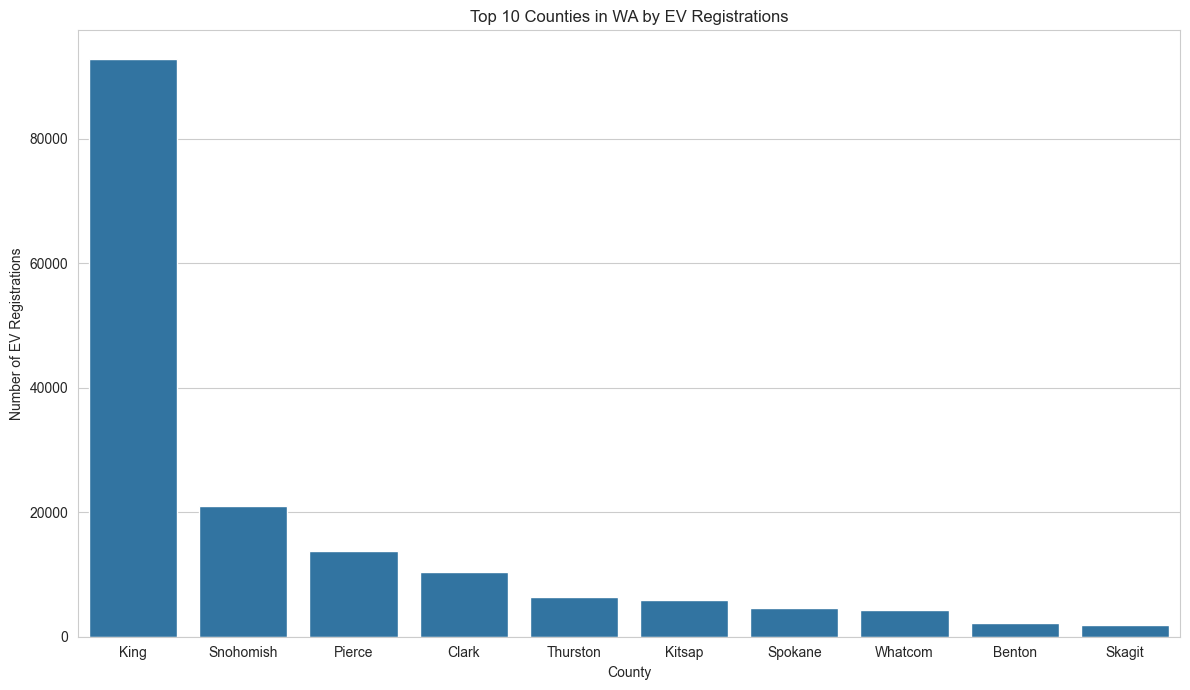

In [9]:
# Analyze County-Level Breakdown within Washington


top_counties = df['County'].value_counts().head(10)
print(top_counties)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_counties.index, y=top_counties.values)
plt.title('Top 10 Counties in WA by EV Registrations')
plt.xlabel('County')
plt.ylabel('Number of EV Registrations')
plt.tight_layout()
plt.show()

**Observations**:
- Infrastructure investments (e.g., charging stations) should be prioritized in King, Snohomish, and Pierce counties, but there is also opportunity for growth in other urban/suburban counties.
- Policy and outreach efforts may be needed to boost adoption in less-represented counties, especially rural areas.

In [10]:

# Extract Latitude and Longitude from 'Vehicle Location'
df['Vehicle Location'] = df['Vehicle Location'].astype(str) # Ensure it's string
df['Longitude'] = df['Vehicle Location'].apply(lambda x: float(x.split(' ')[1].replace('(', '')) if 'POINT' in x else np.nan)
df['Latitude'] = df['Vehicle Location'].apply(lambda x: float(x.split(' ')[2].replace(')', '')) if 'POINT' in x else np.nan)


    Model Year                   Electric Vehicle Type  Electric Range
0         1997          Battery Electric Vehicle (BEV)            39.0
1         1998          Battery Electric Vehicle (BEV)            58.0
2         1999          Battery Electric Vehicle (BEV)            74.0
3         2000          Battery Electric Vehicle (BEV)            58.0
4         2002          Battery Electric Vehicle (BEV)            95.0
5         2003          Battery Electric Vehicle (BEV)            95.0
6         2008          Battery Electric Vehicle (BEV)           220.0
7         2010          Battery Electric Vehicle (BEV)           245.0
8         2010  Plug-in Hybrid Electric Vehicle (PHEV)           100.0
9         2011          Battery Electric Vehicle (BEV)            73.0
10        2011  Plug-in Hybrid Electric Vehicle (PHEV)            35.0
11        2012          Battery Electric Vehicle (BEV)            73.0
12        2012  Plug-in Hybrid Electric Vehicle (PHEV)            35.0
13    

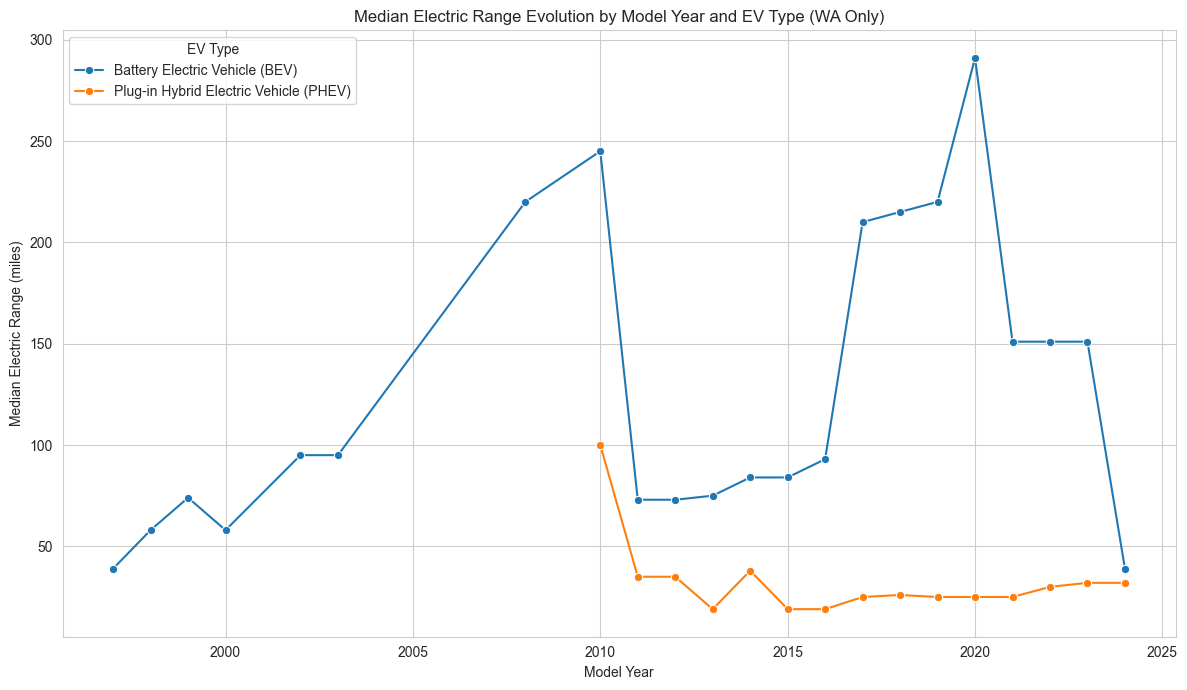

In [11]:
# Analyze Average Electric Range Evolution by Model Year and EV Type
range_evolution = df.groupby(['Model Year', 'Electric Vehicle Type'])['Electric Range'].median().reset_index()
print(range_evolution)

plt.figure(figsize=(12, 7))
sns.lineplot(data=range_evolution, x='Model Year', y='Electric Range', hue='Electric Vehicle Type', marker='o')
plt.title('Median Electric Range Evolution by Model Year and EV Type (WA Only)')
plt.xlabel('Model Year')
plt.ylabel('Median Electric Range (miles)')
plt.legend(title='EV Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**
- Naturally, as technology improves, BEV have generally more capacity while PHEV electric range is stable, reflecting their hybrid design.

In [12]:
# Analyze CAFV Eligibility
print(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts())

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    91790
Clean Alternative Fuel Vehicle Eligible                         66166
Not eligible due to low battery range                           19517
Name: count, dtype: int64


In [13]:
# Correlation between CAFV Eligibility and Electric Type 
print(pd.crosstab(df['Electric Vehicle Type'], df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']))

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible  \
Electric Vehicle Type                                                                        
Battery Electric Vehicle (BEV)                                                       47149   
Plug-in Hybrid Electric Vehicle (PHEV)                                               19017   

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Eligibility unknown as battery range has not been researched  \
Electric Vehicle Type                                                                                             
Battery Electric Vehicle (BEV)                                                                 91790              
Plug-in Hybrid Electric Vehicle (PHEV)                                                             0              

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Not eligible due to low battery range  
Electric Vehicle Type                                                  

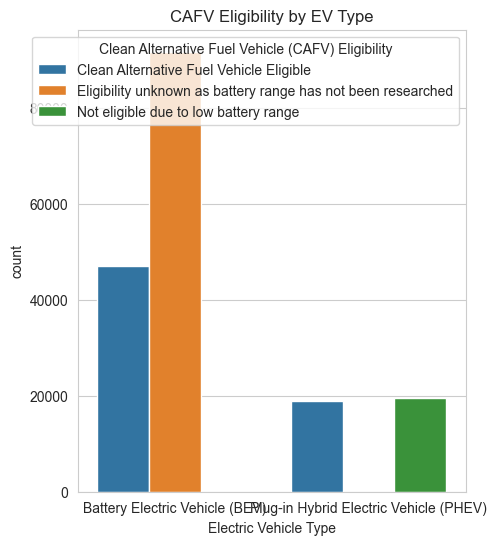

In [14]:
# Visualize Correlation between CAFV Eligibility and Electric Type 
sns.countplot(data=df, x='Electric Vehicle Type', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('CAFV Eligibility by EV Type')
plt.show()

In [15]:
# Correlation between CAFV Eligibility and Make
print(pd.crosstab(df['Make'], df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']))

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible  \
Make                                                                                         
ALFA ROMEO                                                                              39   
AUDI                                                                                   763   
AZURE DYNAMICS                                                                           8   
BENTLEY                                                                                  0   
BMW                                                                                   3792   
CADILLAC                                                                                90   
CHEVROLET                                                                             9338   
CHRYSLER                                                                              2976   
DODGE                                                       

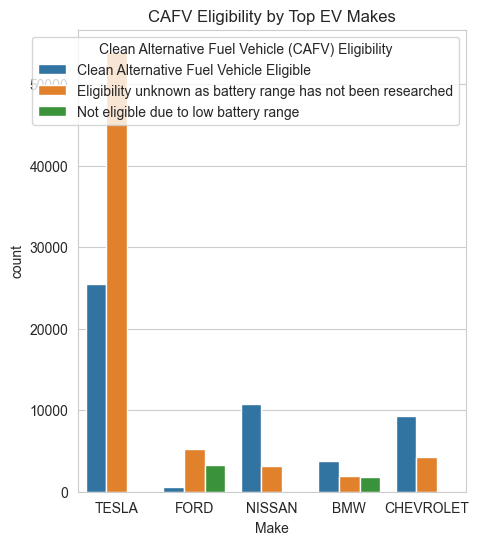

In [16]:
# Visualize Correlation between CAFV Eligibility and Make
top_makes = df['Make'].value_counts().head(5).index
sns.countplot(data=df[df['Make'].isin(top_makes)], x='Make', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('CAFV Eligibility by Top EV Makes')
plt.show()

**Observations:**
- Many BEVs have "Eligibility unknown as battery range has not been researched," which is an interesting data artifact.

- A significant portion of PHEVs are "Not eligible due to low battery range," which makes sense.

- Tesla has a large number of "Eligibility unknown" records. This suggests that the CAFV eligibility status might not be fully populated or consistently defined across all makes/models in the dataset, which is important to note for policy analysis.

In [18]:
df['Model Year Date'] = pd.to_datetime(df['Model Year'].astype(str) + '-12-31')
print("'Model Year Date' column successfully created.")

'Model Year Date' column successfully created.


In [20]:
output_file_path = 'df_wa.csv'
df.to_csv(output_file_path, index=False)
print(f"\nProcessed data saved to: {output_file_path}")


Processed data saved to: df_wa.csv
